# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DATA_PATH = Path('../data/')

## Options

In [3]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)

In [4]:
n_models = 10
patience = 2
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [5]:
with open(DATA_PATH/'input_pipe.pkl', 'rb') as fin:
    input_pipe = pickle.load(fin)

In [6]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 17.360s 


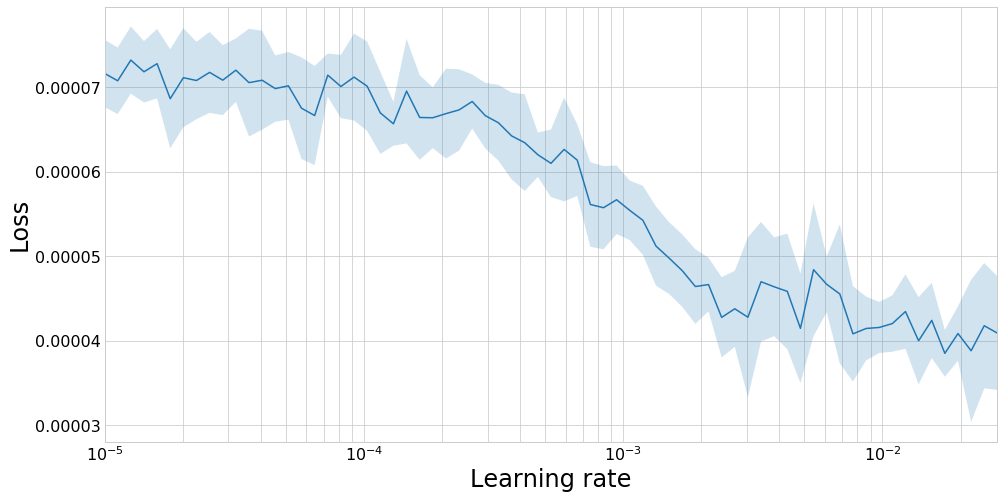

______________________________________



In [7]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [11]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'CosAnnealLR':{'cycle_mult':2, 'reverse':False, 'redux_decay':True}}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
Using cosine LR annealing
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.257468). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129068). Check your callbacks.
  % delta_t_median)


1 New best found: 3.7641690001412175e-05
2 New best found: 3.3816760951316596e-05
3 New best found: 3.3423274795826564e-05
4 New best found: 3.302737457080982e-05
5 New best found: 3.274571989712908e-05
6 New best found: 3.234305849350182e-05
7 New best found: 3.208566069156474e-05
10 New best found: 3.195403630518158e-05
11 New best found: 3.1553203849877104e-05
12 New best found: 3.1419518138206153e-05
13 New best found: 3.126757048563928e-05
14 New best found: 3.123323382204764e-05
22 New best found: 3.1050560888831856e-05
26 New best found: 3.088228429490639e-05
27 New best found: 3.0849668016376064e-05
28 New best found: 3.084447550152011e-05
29 New best found: 3.075023412875368e-05
30 New best found: 3.071679497594432e-05
31 New best found: 3.071670046780724e-05
48 New best found: 3.0649786574609954e-05
53 New best found: 3.0626676391639775e-05
54 New best found: 3.0619084641857426e-05
57 New best found: 3.0568306300129665e-05
59 New best found: 3.0555498170430426e-05
62 New best

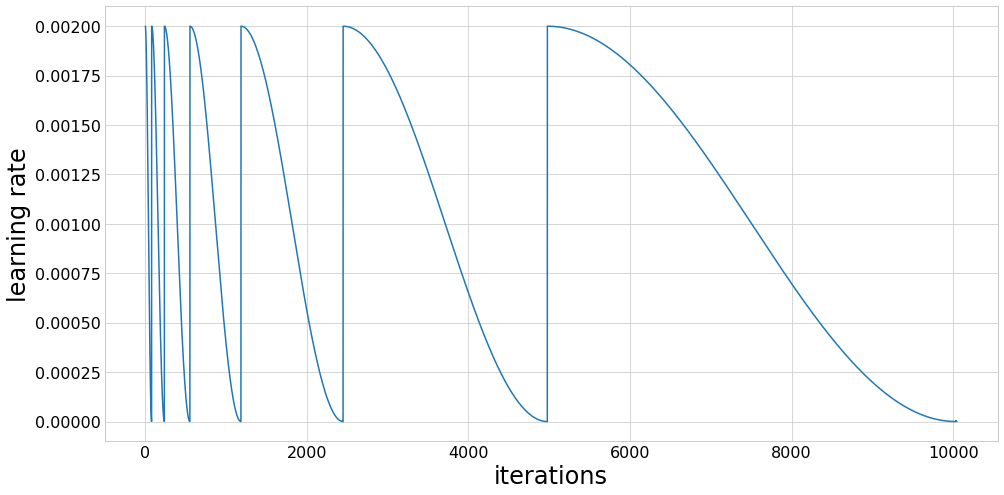

Fold took 145.026s

Training model 2 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.286864). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.143758). Check your callbacks.
  % delta_t_median)


1 New best found: 3.899596293916547e-05
2 New best found: 3.521614262255293e-05
3 New best found: 3.4693043111397124e-05
5 New best found: 3.400228612303923e-05
6 New best found: 3.3539952167821116e-05
7 New best found: 3.3465752393835344e-05
11 New best found: 3.339342904853448e-05
12 New best found: 3.3198119003821604e-05
13 New best found: 3.2829968275284876e-05
14 New best found: 3.268317682108989e-05
15 New best found: 3.2655588157872054e-05
23 New best found: 3.255962774489042e-05
24 New best found: 3.2516314324206716e-05
26 New best found: 3.2507121669562425e-05
27 New best found: 3.233540776713329e-05
29 New best found: 3.2289866316181086e-05
30 New best found: 3.228597691391e-05
31 New best found: 3.228466235694488e-05
47 New best found: 3.226057745632861e-05
51 New best found: 3.22276909994339e-05
54 New best found: 3.220149937183083e-05
57 New best found: 3.2137691269656026e-05
59 New best found: 3.212998429122892e-05
60 New best found: 3.207622024352226e-05
114 New best fou

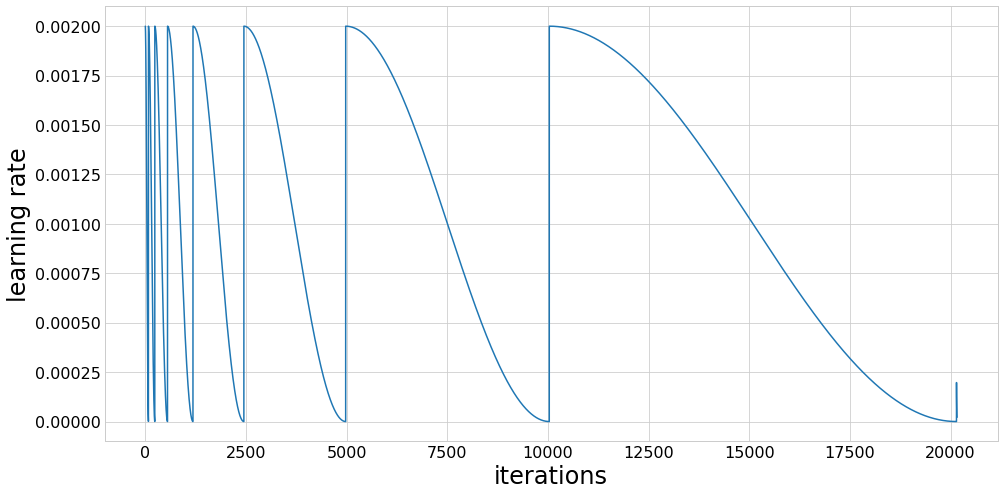

Fold took 273.104s

Training model 3 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.294797). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147749). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8061308697773785e-05
2 New best found: 3.659106333196206e-05
3 New best found: 3.498672089874371e-05
4 New best found: 3.447956186542759e-05
5 New best found: 3.409069191821632e-05
6 New best found: 3.3738386383453466e-05
7 New best found: 3.373703916799295e-05
13 New best found: 3.3107014405381944e-05
14 New best found: 3.297481181430219e-05
15 New best found: 3.2952175871402286e-05
24 New best found: 3.2849426838891994e-05
27 New best found: 3.277631977756351e-05
28 New best found: 3.272124615344278e-05
29 New best found: 3.2650053387412615e-05
49 New best found: 3.263006912067855e-05
53 New best found: 3.260347744965483e-05
55 New best found: 3.25697010919186e-05
56 New best found: 3.246350380568004e-05
58 New best found: 3.2460521325294434e-05
59 New best found: 3.2427268806582556e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=7.659675222511076e-05
128 New best found: 3.2417858753280906e-05
Early stopping after 138 epochs
Score is: {'loss

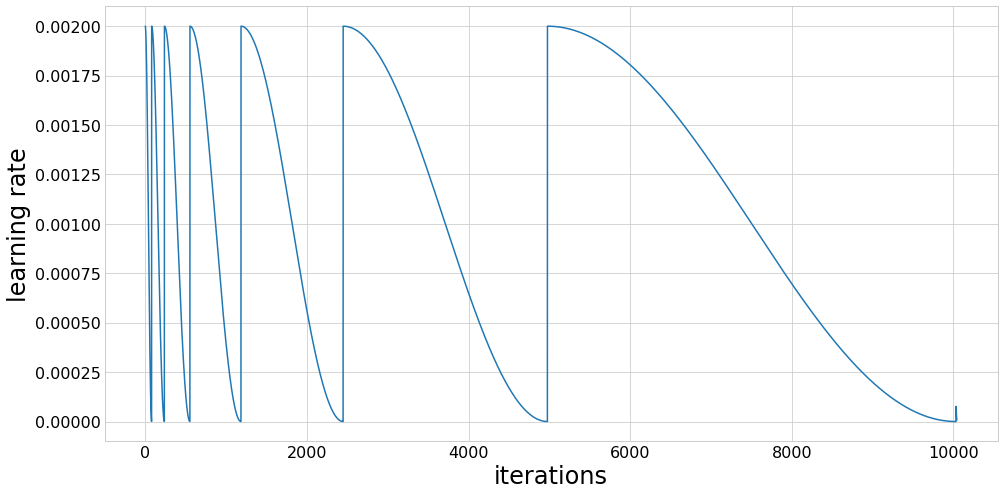

Fold took 145.101s

Training model 4 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.318015). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.159369). Check your callbacks.
  % delta_t_median)


1 New best found: 3.744033107504947e-05
2 New best found: 3.5101378151739483e-05
3 New best found: 3.4520259890996387e-05
4 New best found: 3.424399774812628e-05
5 New best found: 3.360841036046622e-05
6 New best found: 3.330795882939128e-05
7 New best found: 3.3049000658502334e-05
9 New best found: 3.289114509971114e-05
11 New best found: 3.274524147782358e-05
12 New best found: 3.247889224730898e-05
13 New best found: 3.2306846538267564e-05
14 New best found: 3.218294462785707e-05
15 New best found: 3.21749905931938e-05
22 New best found: 3.216611675743479e-05
23 New best found: 3.197959950484801e-05
24 New best found: 3.196495595620945e-05
25 New best found: 3.183679329813458e-05
26 New best found: 3.1815293778345224e-05
28 New best found: 3.171009301368031e-05
29 New best found: 3.1698414433049036e-05
30 New best found: 3.1673862363095395e-05
31 New best found: 3.1671746306528806e-05
48 New best found: 3.1646314848330806e-05
50 New best found: 3.16261898202356e-05
51 New best found

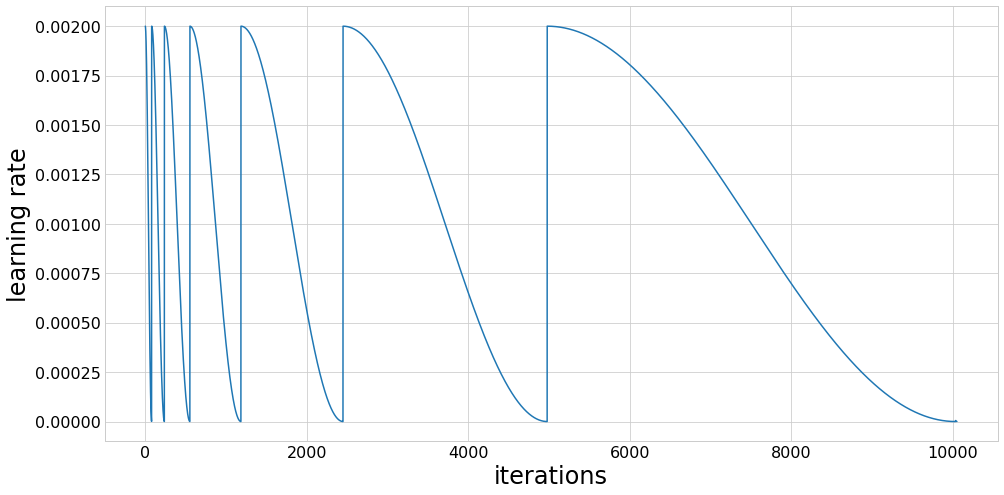

Fold took 152.724s

Training model 5 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.354760). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.177738). Check your callbacks.
  % delta_t_median)


1 New best found: 3.702310819490064e-05
2 New best found: 3.551571276064355e-05
3 New best found: 3.441173229117403e-05
4 New best found: 3.41200827470529e-05
5 New best found: 3.3377069487232695e-05
6 New best found: 3.3187813953652836e-05
7 New best found: 3.310026616936576e-05
11 New best found: 3.273867168824385e-05
12 New best found: 3.251861654532555e-05
13 New best found: 3.24708565130868e-05
14 New best found: 3.240924935596402e-05
15 New best found: 3.2391830338697114e-05
26 New best found: 3.2302092780128615e-05
27 New best found: 3.214186637265742e-05
28 New best found: 3.211493781278475e-05
29 New best found: 3.2067116323059214e-05
30 New best found: 3.2066582235107465e-05
31 New best found: 3.2056605599081956e-05
49 New best found: 3.194778741402645e-05
54 New best found: 3.191872795156193e-05
55 New best found: 3.19162273827716e-05
56 New best found: 3.1846129101779885e-05
60 New best found: 3.1842603903862665e-05
CosineAnneal stalling after 127 epochs, entering redux dec

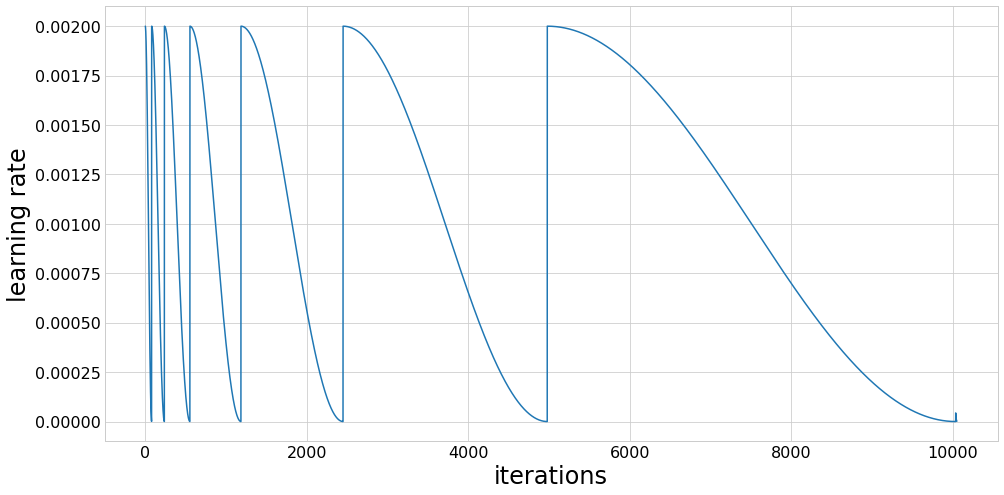

Fold took 155.938s

Training model 6 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.392222). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.196517). Check your callbacks.
  % delta_t_median)


1 New best found: 3.765398414980154e-05
2 New best found: 3.490428465156583e-05
3 New best found: 3.476714089047164e-05
4 New best found: 3.441495769075118e-05
5 New best found: 3.404237357754028e-05
6 New best found: 3.3374343877949285e-05
7 New best found: 3.332982754800469e-05
11 New best found: 3.302639046305558e-05
13 New best found: 3.274466650473187e-05
14 New best found: 3.264924485702068e-05
15 New best found: 3.262952340010088e-05
23 New best found: 3.2539924926823006e-05
24 New best found: 3.243718568992335e-05
26 New best found: 3.2320991870074066e-05
28 New best found: 3.2179225455911364e-05
29 New best found: 3.213989515643334e-05
30 New best found: 3.212819778418634e-05
31 New best found: 3.212800151814008e-05
47 New best found: 3.2012325507821514e-05
51 New best found: 3.1934551571612246e-05
53 New best found: 3.1888350266672204e-05
55 New best found: 3.1861400045454505e-05
56 New best found: 3.1813071675424e-05
62 New best found: 3.181090059370035e-05
63 New best found

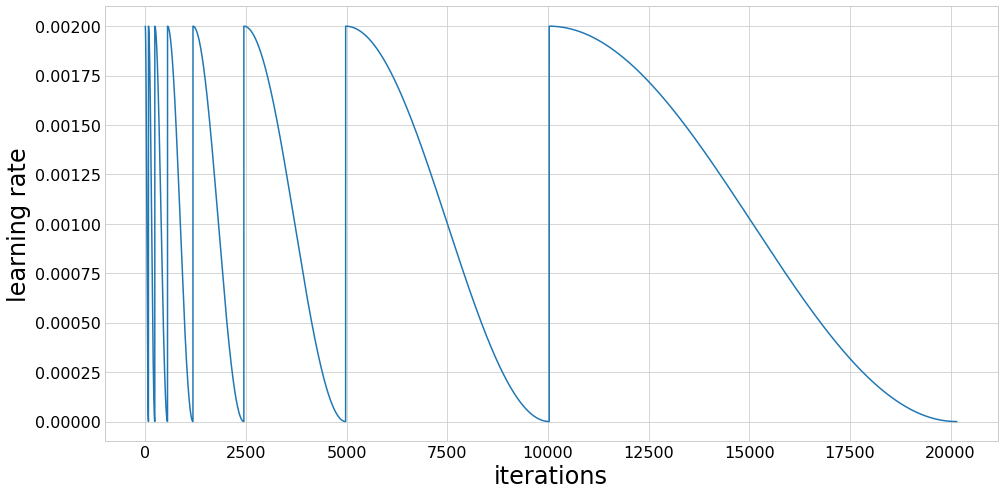

Fold took 289.186s

Training model 7 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.429765). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.215304). Check your callbacks.
  % delta_t_median)


1 New best found: 3.922143698437139e-05
2 New best found: 3.577550441987114e-05
3 New best found: 3.5210336215095597e-05
5 New best found: 3.422202822184772e-05
6 New best found: 3.371305572800338e-05
7 New best found: 3.359009136183886e-05
11 New best found: 3.33165373041993e-05
12 New best found: 3.3123510063160214e-05
13 New best found: 3.2865890352695716e-05
14 New best found: 3.276121277231141e-05
15 New best found: 3.275662517844467e-05
20 New best found: 3.267606447916478e-05
23 New best found: 3.246105257057934e-05
27 New best found: 3.22860119624238e-05
28 New best found: 3.222613267789711e-05
30 New best found: 3.216487256504479e-05
51 New best found: 3.204467518953606e-05
56 New best found: 3.20368987187976e-05
57 New best found: 3.193472236307571e-05
111 New best found: 3.188221825184883e-05
CosineAnneal stalling after 255 epochs, entering redux decay at LR=0.0002933327365994069
Early stopping after 265 epochs
Score is: {'loss': 3.188221825184883e-05, 'wAUC': 0.063957530944

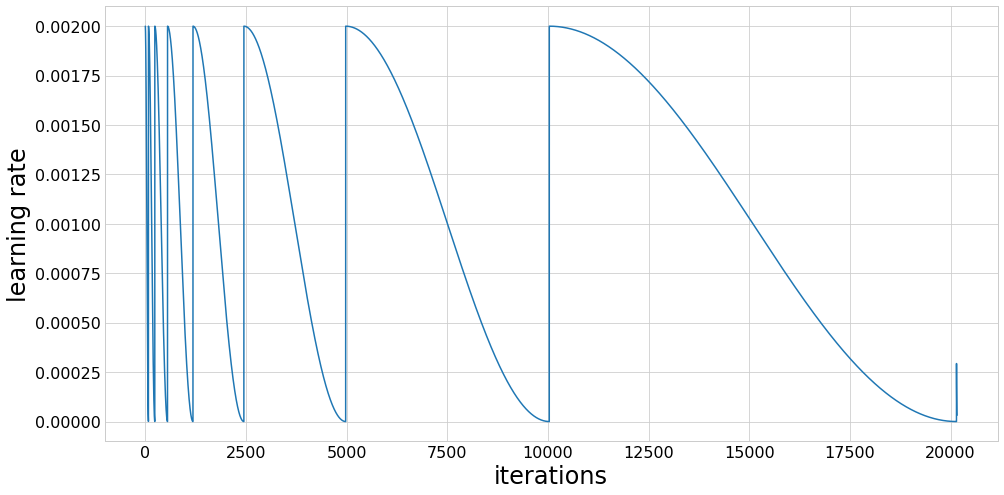

Fold took 287.580s

Training model 8 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.466415). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.233756). Check your callbacks.
  % delta_t_median)


1 New best found: 3.907390281663131e-05
2 New best found: 3.616296158648951e-05
3 New best found: 3.488351352922368e-05
5 New best found: 3.4115873526223646e-05
6 New best found: 3.3663466523790966e-05
7 New best found: 3.356663755360862e-05
10 New best found: 3.353343630444051e-05
11 New best found: 3.301536675575593e-05
12 New best found: 3.2806340822335236e-05
14 New best found: 3.271927687750898e-05
15 New best found: 3.265706912544681e-05
24 New best found: 3.248049705483992e-05
25 New best found: 3.240302422660023e-05
26 New best found: 3.2280645311863166e-05
29 New best found: 3.226856716988482e-05
30 New best found: 3.2248871618352174e-05
31 New best found: 3.2247672404729306e-05
47 New best found: 3.219059100887902e-05
51 New best found: 3.2168092381374815e-05
56 New best found: 3.212155268187526e-05
59 New best found: 3.211810180364886e-05
60 New best found: 3.206965128545166e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.342114733391104e-05
128 New 

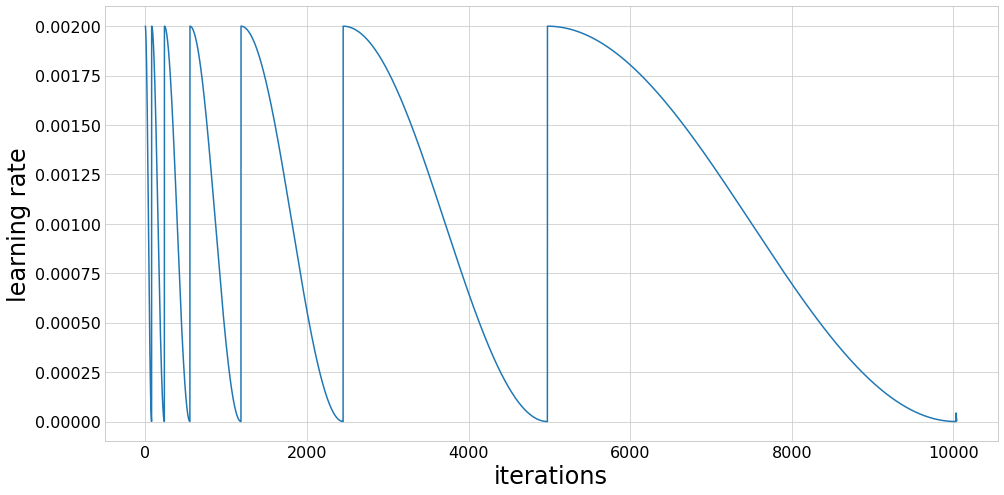

Fold took 153.319s

Training model 9 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.486613). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.243759). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8554619306257485e-05
2 New best found: 3.481092033246756e-05
3 New best found: 3.443660653328503e-05
5 New best found: 3.409854625135412e-05
6 New best found: 3.3388939084788074e-05
7 New best found: 3.3282731659903885e-05
12 New best found: 3.28697436594739e-05
14 New best found: 3.266856155939377e-05
15 New best found: 3.26589095152309e-05
25 New best found: 3.244471874242151e-05
26 New best found: 3.2389928891167534e-05
27 New best found: 3.2225662581272635e-05
30 New best found: 3.221897572357168e-05
31 New best found: 3.221109597797454e-05
50 New best found: 3.217706560830736e-05
52 New best found: 3.213514152353271e-05
53 New best found: 3.208093787315521e-05
57 New best found: 3.202153761546453e-05
60 New best found: 3.200333523200969e-05
61 New best found: 3.197526124995924e-05
62 New best found: 3.1970313478020947e-05
63 New best found: 3.197019624653238e-05
CosineAnneal stalling after 255 epochs, entering redux decay at LR=7.721747127654725e-10
256 New bes

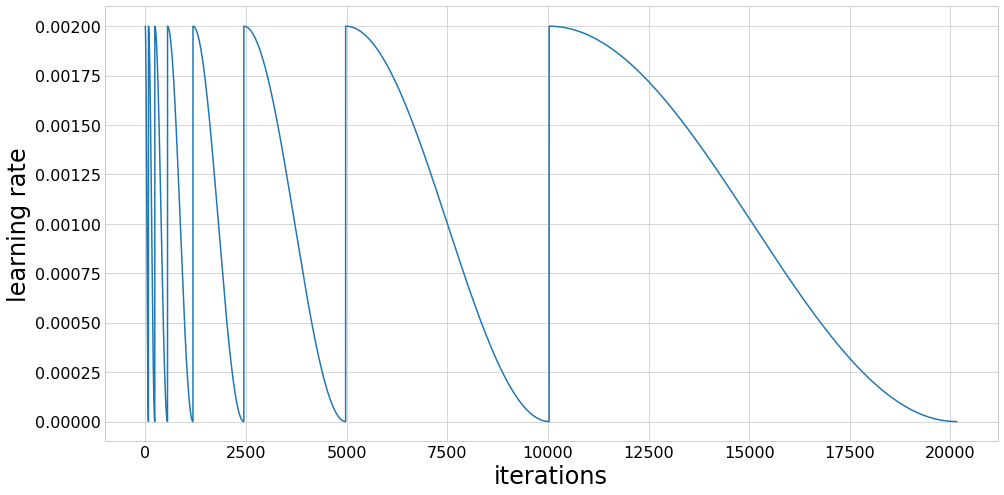

Fold took 299.098s

Training model 10 / 10
Using cosine LR annealing


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.502584). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.251725). Check your callbacks.
  % delta_t_median)


1 New best found: 3.831734359555412e-05
2 New best found: 3.561390157992719e-05
3 New best found: 3.520017582050059e-05
4 New best found: 3.4789270971668886e-05
5 New best found: 3.4011924466176425e-05
6 New best found: 3.378834322138573e-05
7 New best found: 3.3742973345943026e-05
10 New best found: 3.348474827653263e-05
11 New best found: 3.318007729249075e-05
13 New best found: 3.304102017063997e-05
14 New best found: 3.298719255981268e-05
15 New best found: 3.296432577917585e-05
22 New best found: 3.290340580715565e-05
25 New best found: 3.270837734307861e-05
26 New best found: 3.270817786979023e-05
27 New best found: 3.2545347925042734e-05
29 New best found: 3.25109198827704e-05
47 New best found: 3.250849243195262e-05
49 New best found: 3.2435461445857074e-05
55 New best found: 3.23786488683254e-05
58 New best found: 3.230583776676212e-05
60 New best found: 3.2280833936238196e-05
CosineAnneal stalling after 127 epochs, entering redux decay at LR=4.342114733391104e-05
Early stoppi

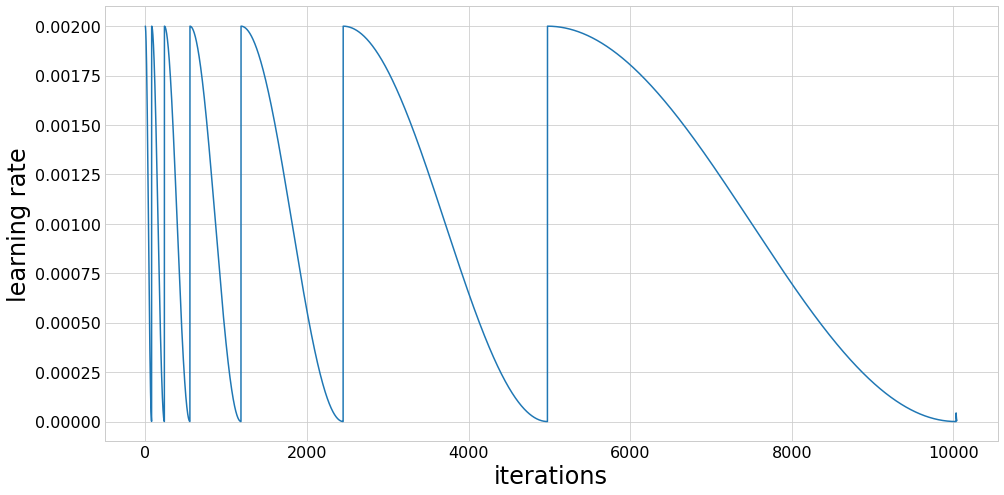

Fold took 157.600s


______________________________________
Training finished
Cross-validation took 2062.220s 


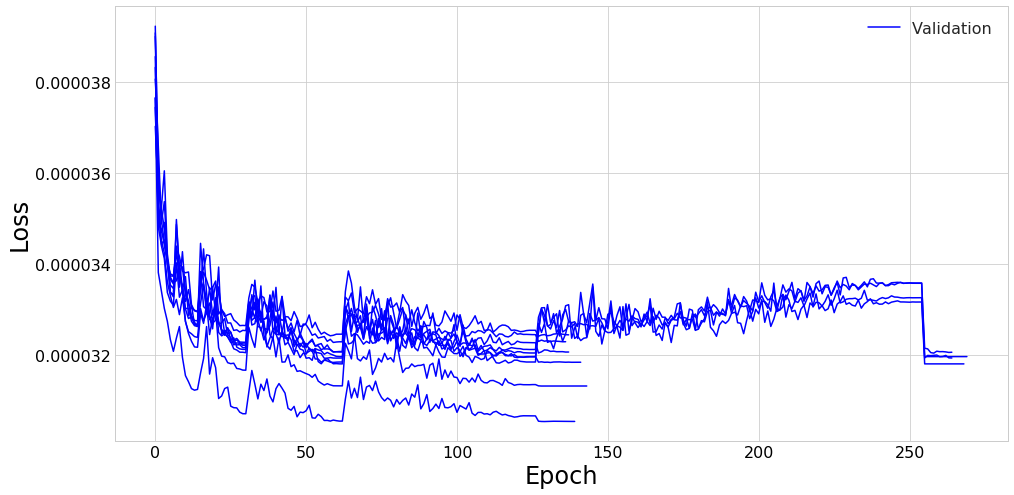

Mean loss = 3.18e-05 +- 2e-07
Mean wAUC = 0.0635 +- 0.0007
Mean AUC = 0.0991 +- 0.0009
Mean AMS = 3.79 +- 0.07
Mean cut = 0.945 +- 0.005
______________________________________



<Figure size 432x288 with 0 Axes>

In [12]:
results, histories = fold_train_model(train_fy, n_models,
                                      model_gen_params=model_gen_params,
                                      train_params=train_params, train_on_weights=True,
                                      use_callbacks=use_callbacks, ams_args=ams_args,
                                      max_epochs=max_epochs, patience=patience,
                                      verbose=1, plots=plots)

The impact of data augmentation is pretty clear. Comparing the training here to that of the the CRL Swish model without augmentation we can see that we effectively gain another LR cycles worth of training epochs before we start overfitting, which allows the networks to reach much lower looses (3.18e-5 c.f. 3.23e-5) and a higher AMSs (3.98 c.f. 3.71)

## Construct ensemble

In [13]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [14]:
ensemble, weights = assemble_ensemble(results, ensemble_size, ensemble_mode, compile_args)

Choosing ensemble by loss
Model 0 is 0 with loss = 3.054534866487445e-05
Model 1 is 3 with loss = 3.132368298029178e-05
Model 2 is 5 with loss = 3.1810470539494415e-05
Model 3 is 4 with loss = 3.184148433165236e-05
Model 4 is 6 with loss = 3.188221825184883e-05
Model 5 is 8 with loss = 3.1970196172309246e-05
Model 6 is 1 with loss = 3.203933560526112e-05
Model 7 is 7 with loss = 3.204957562035998e-05
Model 8 is 9 with loss = 3.2280833936238196e-05
Model 9 is 2 with loss = 3.2417858753280906e-05


## Response on validation data

In [15]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [16]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.002057191240042448s per sample

Predicting fold 2 out of 10
Prediction took 0.00035340406447649004s per sample

Predicting fold 3 out of 10
Prediction took 0.0003563364252448082s per sample

Predicting fold 4 out of 10
Prediction took 0.0003546994425356388s per sample

Predicting fold 5 out of 10
Prediction took 0.0003442329317331314s per sample

Predicting fold 6 out of 10
Prediction took 0.0003501830421388149s per sample

Predicting fold 7 out of 10
Prediction took 0.00035290733724832536s per sample

Predicting fold 8 out of 10
Prediction took 0.00035000982731580736s per sample

Predicting fold 9 out of 10
Prediction took 0.0003563054844737053s per sample

Predicting fold 10 out of 10
Prediction took 0.00035221200436353684s per sample



In [17]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source)),
                                                           roc_auc_score(get_feature('targets', val_fy.source), get_feature('pred', val_fy.source), sample_weight=get_feature('weights', val_fy.source))))

Testing ROC AUC: unweighted 0.9031770889140815, weighted 0.93563350562343


In [18]:
ams_scan_slow(convert_to_df(val_fy.source), br=10, w_factor=250000/50000)

50000 candidates loaded


(3.9178952617056835, 0.96601516)

In [19]:
%%time
bootstrap_mean_calc_ams(convert_to_df(val_fy.source), br=10, w_factor=250000/50000, N=512)

50000 candidates loaded

Mean calc_ams=4.0+-0.2, at mean cut of 0.97+-0.01
Exact mean cut 0.9663715879432857, corresponds to calc_ams of 3.8874838322287744
CPU times: user 1.97 s, sys: 14.6 s, total: 16.6 s
Wall time: 2min 21s


(4.0, 0.97)

# Test scoring

In [20]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [21]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.00035729723782701927s per sample

Predicting fold 2 out of 10
Prediction took 0.0003532065408473665s per sample

Predicting fold 3 out of 10
Prediction took 0.000354531463642012s per sample

Predicting fold 4 out of 10
Prediction took 0.00035767355236140166s per sample

Predicting fold 5 out of 10
Prediction took 0.00035629657371477646s per sample

Predicting fold 6 out of 10
Prediction took 0.00035987634354016997s per sample

Predicting fold 7 out of 10
Prediction took 0.00035663601918654007s per sample

Predicting fold 8 out of 10
Prediction took 0.0003529937888410958s per sample

Predicting fold 9 out of 10
Prediction took 0.00035713387192650277s per sample

Predicting fold 10 out of 10
Prediction took 0.0003523858404295011s per sample

CPU times: user 3min 25s, sys: 21.8 s, total: 3min 47s
Wall time: 3min 15s


In [38]:
score_test_data(test_fy.source, 0.9663715879432857)

Public:Private AMS: 3.5851814664756594 : 3.66428494007607


(3.5851814664756594, 3.66428494007607)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)